In [16]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv("train.csv")
print(df)

            id         Brand Material    Size  Compartments  \
0            0      Jansport  Leather  Medium           7.0   
1            1      Jansport   Canvas   Small          10.0   
2            2  Under Armour  Leather   Small           2.0   
3            3          Nike    Nylon   Small           8.0   
4            4        Adidas   Canvas  Medium           1.0   
...        ...           ...      ...     ...           ...   
299995  299995        Adidas  Leather   Small           9.0   
299996  299996      Jansport  Leather   Large           6.0   
299997  299997          Puma   Canvas   Large           9.0   
299998  299998        Adidas    Nylon   Small           1.0   
299999  299999  Under Armour   Canvas   Small           2.0   

       Laptop Compartment Waterproof      Style  Color  Weight Capacity (kg)  \
0                     Yes         No       Tote  Black             11.611723   
1                     Yes        Yes  Messenger  Green             27.078537   
2  

In [18]:
d={'Jansport':0,'Under Armour':1, 'Nike':2, 'Adidas':3, 'Puma':4}
df['Brand']=df['Brand'].map(d)
d={'Leather':0, 'Canvas':1, 'Nylon':2, 'Polyester':3}
df['Material']=df['Material'].map(d)
d={'Small':0, 'Medium':1, 'Large':2}
df['Size']=df['Size'].map(d)
d={'Yes':1, 'No':0}
df['Laptop Compartment']=df['Laptop Compartment'].map(d)
df['Waterproof']=df['Waterproof'].map(d)
d={'Tote':0, 'Messenger':1, 'Backpack':2}
df['Style']=df['Style'].map(d)
d={'Black':0, 'Green':1, 'Red':2,'Blue':3, 'Pink':4, 'Gray':5}
df['Color']=df['Color'].map(d)

In [19]:
print(df)

            id  Brand  Material  Size  Compartments  Laptop Compartment  \
0            0    0.0       0.0   1.0           7.0                 1.0   
1            1    0.0       1.0   0.0          10.0                 1.0   
2            2    1.0       0.0   0.0           2.0                 1.0   
3            3    2.0       2.0   0.0           8.0                 1.0   
4            4    3.0       1.0   1.0           1.0                 1.0   
...        ...    ...       ...   ...           ...                 ...   
299995  299995    3.0       0.0   0.0           9.0                 0.0   
299996  299996    0.0       0.0   2.0           6.0                 0.0   
299997  299997    4.0       1.0   2.0           9.0                 1.0   
299998  299998    3.0       2.0   0.0           1.0                 0.0   
299999  299999    1.0       1.0   0.0           2.0                 0.0   

        Waterproof  Style  Color  Weight Capacity (kg)      Price  
0              0.0    0.0    0.

In [20]:
df.isnull().sum()

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [21]:
df.fillna(df.mean(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [22]:
print(df)

            id  Brand  Material  Size  Compartments  Laptop Compartment  \
0            0    0.0       0.0   1.0           7.0                 1.0   
1            1    0.0       1.0   0.0          10.0                 1.0   
2            2    1.0       0.0   0.0           2.0                 1.0   
3            3    2.0       2.0   0.0           8.0                 1.0   
4            4    3.0       1.0   1.0           1.0                 1.0   
...        ...    ...       ...   ...           ...                 ...   
299995  299995    3.0       0.0   0.0           9.0                 0.0   
299996  299996    0.0       0.0   2.0           6.0                 0.0   
299997  299997    4.0       1.0   2.0           9.0                 1.0   
299998  299998    3.0       2.0   0.0           1.0                 0.0   
299999  299999    1.0       1.0   0.0           2.0                 0.0   

        Waterproof  Style  Color  Weight Capacity (kg)      Price  
0              0.0    0.0    0.

In [23]:
df.isnull().sum()

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

In [24]:
X = df.drop(columns=['id', 'Price'])
y=df['Price']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.65,random_state=42)

In [26]:
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [27]:
y_pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1523.053169833812
R-squared: -0.0003449386962492973


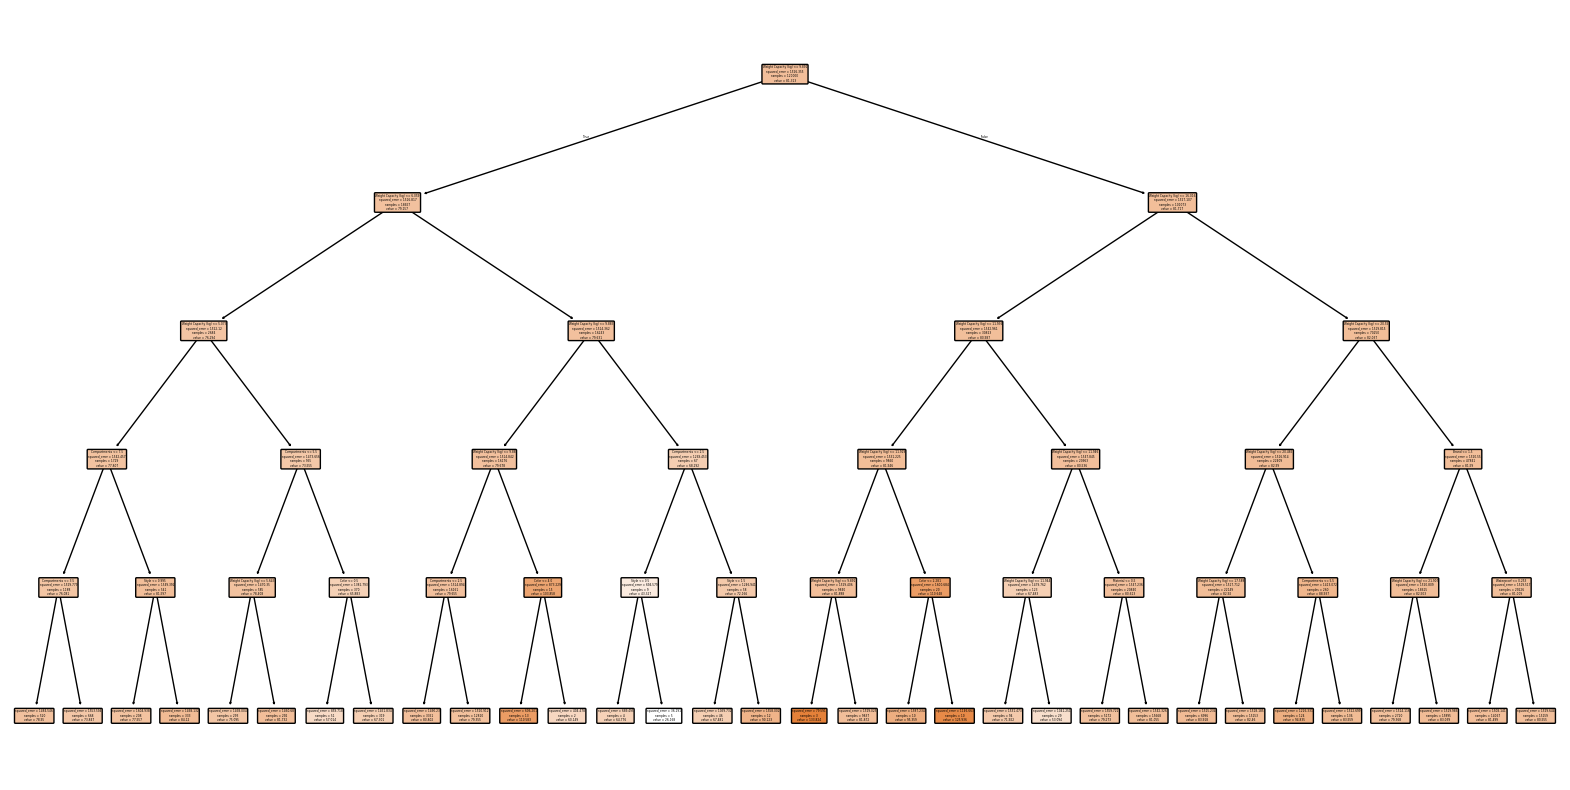

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, rounded=True)
plt.show()

In [30]:
results_df = pd.DataFrame({
    'id': X_test.index, 
    'Predicted_Price': y_pred
})

results_df.to_csv('vansh_backpack.csv', index=False)

print("Predictions saved to 'vansh_backpack.csv'")

Predictions saved to 'vansh_backpack.csv'
